In [1]:
import piplite
await piplite.install(['numpy','pandas','seaborn', 'matplotlib'])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

<ipython-input-2-706826b0bf5b>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [25]:
df = pd.read_csv('GPA_RE Coding Test Data.csv')

df.head()

,Age,Experience,Education,Hours Worked Per Week,Certifications,Salary,Job Satisfaction
0,42,30,PhD,32,One,20898.987806,6.810519
1,59,10,Master's,24,NaN,10662.065733,6.258449
2,30,3,Bachelor's,30,Multiple,5030.624162,10.412620
3,27,17,Bachelor's,29,Multiple,17891.581009,9.871717
4,48,3,Master's,32,One,9553.799801,8.040346


# Using Linear Regression with univariate 

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Experience'].values.reshape(-1, 1), df['Salary'], test_size=0.2, random_state=50
)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

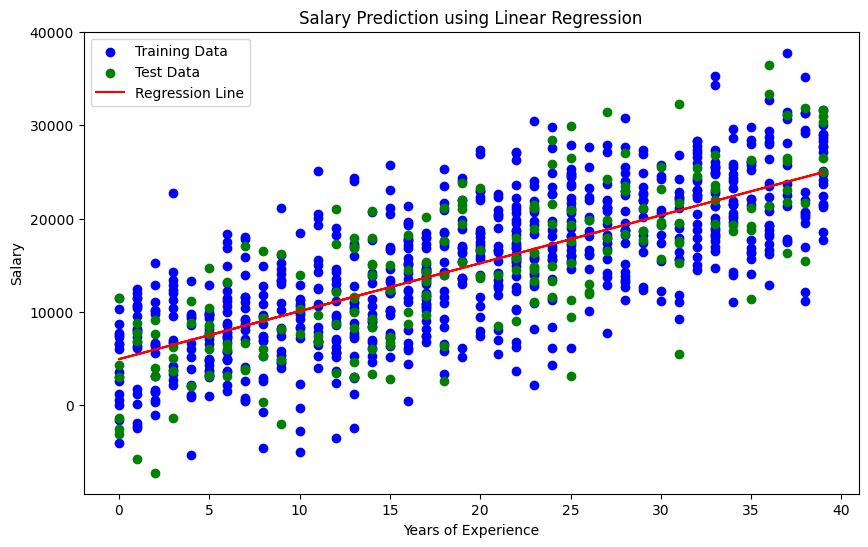

In [5]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction using Linear Regression')
plt.legend()
plt.show()

In [6]:
# Print results
print(f"Model Coefficient (slope): ${model.coef_[0]:.2f} per year of experience")
print(f"Model Intercept (base salary): ${model.intercept_:.2f}")
# Example prediction
new_experience = np.array([[10]])  # 10 years of experience
predicted_salary = model.predict(new_experience)
print(f"\nPredicted salary for 10 years of experience: ${predicted_salary[0]:.2f}")

Model Coefficient (slope): $514.74 per year of experience
Model Intercept (base salary): $4906.25

Predicted salary for 10 years of experience: $10053.64


# Using Linear Regression with multivariate

In [26]:
df.Education.value_counts()

Education
PhD            258
Master's       254
Bachelor's     253
High School    235
Name: count, dtype: int64

In [27]:
# Change value in Certifications
df['Certifications'] = df['Certifications'].replace({'One': 1,  'Multiple' : 2})
df.replace({"High School":0,"Bachelor's":1,"Master's":2,"PhD":3},inplace=True)
df = df.fillna(0)

# Set up features and target
X = df.drop(['Salary','Job Satisfaction'], axis=1)
y = df['Salary']
    
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


<ipython-input-27-0643eb75682a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Certifications'] = df['Certifications'].replace({'One': 1,  'Multiple' : 2})
<ipython-input-27-0643eb75682a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"High School":0,"Bachelor's":1,"Master's":2,"PhD":3},inplace=True)



Model Performance Metrics:
Mean Squared Error: $25365775.38
R² Score: 0.6043

Feature Importance:
                 Feature  Coefficient
1             Experience  5766.499554
2              Education  1225.684977
0                    Age   328.881680
4         Certifications   -66.859333
3  Hours Worked Per Week  -166.966825


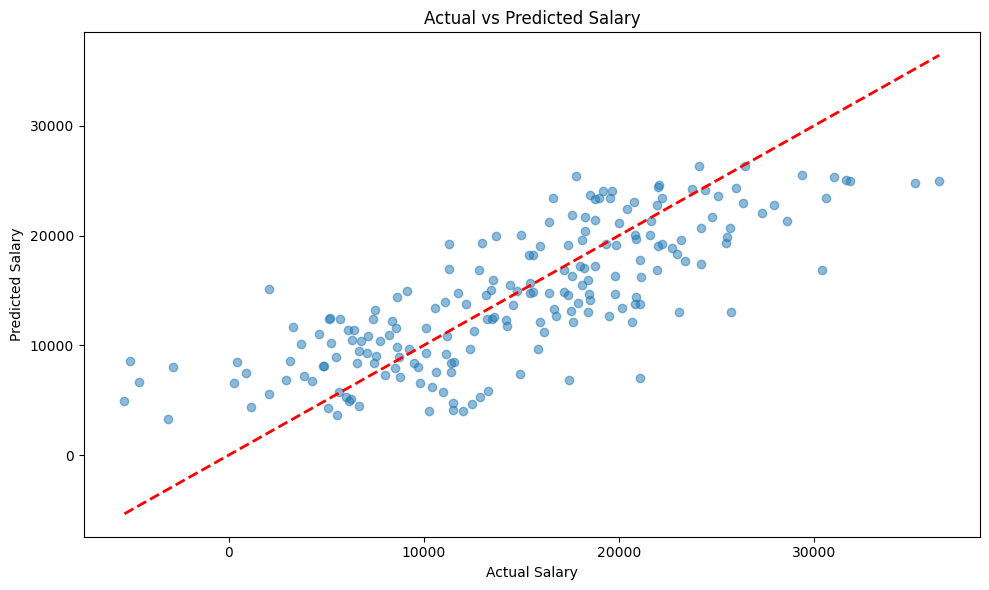

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print("\nModel Performance Metrics:")
print(f"Mean Squared Error: ${mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.tight_layout()
plt.show()

Looking at the Feature with the Coeficient. 
I think that Experience and Age is colerrated with Salary whereas Hour work per week and Certifications is not.

In [29]:
# Create a function to predict the salary
def predict_salary(model, scaler, features):
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)
    return prediction[0]

#Example prediction with Adam who is 30 years old, has 10 years of experience, 1 certification, working 40 hours, has PhD
adam_data = {'Age': [30], 'Experience': [10], 'Education': 3, 'Hours Worked Per Week': [40], 'Certifications': [1]}
adam = pd.DataFrame(adam_data)

predicted_salary = predict_salary(model, scaler, adam)
print(f"\nPredicted price for Adam: ${predicted_salary:,.2f}")


Predicted price for Adam: $11,163.45


In [32]:
#Example prediction with Harry who is 20 years old, has 3 years of experience, has Bachelor, 0 certification, working 40 hours
harry_data = {'Age': [20], 'Experience': [3], 'Education': 1, 'Hours Worked Per Week': [40], 'Certifications': [0]}
harry = pd.DataFrame(harry_data)

predicted_salary = predict_salary(model, scaler, harry)
print(f"\nPredicted price for Harry: ${predicted_salary:,.2f}")


Predicted price for Harry: $5,071.51
